In [19]:
%load_ext autoreload
%autoreload 2

In [21]:
import sys
sys.path.append('../src')
# Import necessary modules
from eda import EDA
import pandas as pd
from visualizations import SalesVisualizer

In [22]:

# Initialize EDA class
eda = EDA(train_path='../data/raw/train.csv', store_path='../data/raw/store.csv' )


In [23]:
# Load and merge datasets
merged_df = eda.load_and_merge_data()
raw_data = merged_df.copy()
print("Data merged successfully.")

2025-01-13 13:45:10,957 - EDA - INFO - Loading train and store datasets...
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\eda.py:19: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(self.train_path)
2025-01-13 13:45:11,782 - EDA - INFO - Datasets loaded successfully. Merging them...
2025-01-13 13:45:12,036 - EDA - INFO - Datasets merged successfully.


Data merged successfully.


Loaded and merged our train data and store data to perform Data exploration

In [27]:
# Explore Data
head, info, stats = eda.explore_data()

2025-01-09 14:09:46,276 - EDA - INFO - Exploring dataset...
2025-01-09 14:09:46,280 - EDA - INFO - First 5 Rows:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  Competiti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

2025-01-09 14:09:46,967 - EDA - INFO - Basic Statistics:
              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.014567e+06   
mean   3.815145e-01   1.786467e-01         5.430086e+03   
std    4.857586e-01   3.830564e-01         7.715324e+0

### Data Exploration
In this step, we explored the dataset by checking its basic properties and summarizing the key statistics:

1. **First 5 Rows**:
   - Displayed the first 5 rows to get an initial view of the dataset's structure and the type of data it holds.
   
2. **Data Information**:
   - Provided an overview of the dataset, including the number of entries (1,017,209) and columns (18).
   - Listed the column names, data types, and the number of non-null values in each column.
   - Notably, some columns like `CompetitionDistance`, `CompetitionOpenSinceMonth`, and `Promo2SinceWeek` contain missing values.

3. **Basic Statistics**:
   - Displayed summary statistics for numerical columns, including mean, standard deviation, min, max, and quartiles.
   - For instance, `Sales` has a mean of 5,773.8 with a max value of 41,551, while `CompetitionDistance` has a mean of 5,430.1 with a large range.


In [28]:
# Check Missing Values
missing_values_df = eda.check_missing_values()

2025-01-09 14:09:54,109 - EDA - INFO - Checking for missing values in the dataset...
2025-01-09 14:09:54,242 - EDA - INFO - Missing values calculated successfully.
2025-01-09 14:09:54,243 - EDA - INFO - Missing Values Summary:
                           Missing Values  Percentage
Promo2SinceWeek                    508031   49.943620
PromoInterval                      508031   49.943620
Promo2SinceYear                    508031   49.943620
CompetitionOpenSinceYear           323348   31.787764
CompetitionOpenSinceMonth          323348   31.787764
CompetitionDistance                  2642    0.259730


### Missing Data
Next, we focused on checking and understanding the missing data in the dataset:

1. **Checking for Missing Values**:
   - We identified that some columns have missing values, specifically `Promo2SinceWeek`, `PromoInterval`, `Promo2SinceYear`, and others.
   
2. **Missing Values Summary**:
   - A summary was provided listing the columns with missing values along with the number of missing entries and the percentage of missing data.
   - Key columns with missing data include:
     - `Promo2SinceWeek`, `PromoInterval`, and `Promo2SinceYear` (all have around 50% missing values).
     - `CompetitionOpenSinceYear` and `CompetitionOpenSinceMonth` (approximately 31.7% missing values).
     - `CompetitionDistance` (only a small fraction of missing values—0.26%).

### Conclusion and Next Steps

**Conclusion**:
- The dataset contains a significant amount of missing values, particularly in the columns related to promotions (`Promo2SinceWeek`, `PromoInterval`, `Promo2SinceYear`), and competition-related features (`CompetitionOpenSinceYear`, `CompetitionOpenSinceMonth`).
- While some columns, like `CompetitionDistance`, have minimal missing data, others, like `PromoInterval` and `Promo2SinceWeek`, have a considerable percentage of missing values (~50%).

**Next Steps**
1. **Clean data**
2. **Detect outliners**
3. **Handle outliners using appropraite methods**

In [24]:
# Process and clean the data
cleaned_df = eda.process_and_clean_data()
print("Data cleaned successfully.")

2025-01-13 13:45:21,146 - EDA - INFO - Processing and cleaning data: Handling missing values, converting data types, and checking for negative values...
2025-01-13 13:45:21,460 - EDA - INFO - Missing values in 'CompetitionDistance' filled with median value.
2025-01-13 13:45:21,496 - EDA - INFO - Missing values in 'CompetitionOpenSinceMonth' filled with median value.
2025-01-13 13:45:21,566 - EDA - INFO - Missing values in 'CompetitionOpenSinceYear' filled with median value.
2025-01-13 13:45:21,609 - EDA - INFO - Missing values in 'Promo2SinceWeek' filled with median value.
2025-01-13 13:45:21,639 - EDA - INFO - Missing values in 'Promo2SinceYear' filled with median value.
2025-01-13 13:45:21,763 - EDA - INFO - Missing values in 'PromoInterval' filled with 'Unknown'.
2025-01-13 13:45:21,814 - EDA - INFO - Converted 'StateHoliday' to category.
2025-01-13 13:45:21,859 - EDA - INFO - Converted 'StoreType' to category.
2025-01-13 13:45:21,909 - EDA - INFO - Converted 'Assortment' to categor

Data cleaned successfully.


In [7]:
# Check for missing values after cleaning
missing_values_after_cleaning = eda.df.isnull().sum()

# Display missing values summary
print("Missing Values After Cleaning:")
print(missing_values_after_cleaning)


Missing Values After Cleaning:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


### Data Cleaning and Missing Values Handling

In this step, we handled the missing values in the dataset by performing the following actions:

1. **Categorical Columns**:
   - Missing values in categorical columns were filled with the string `'Unknown'`.

2. **Numerical Columns**:
   - Missing values in numerical columns were filled with the **median** value of the respective column.

3. **Data Type Conversion**:
   - Certain columns were explicitly converted to appropriate data types:
     - `StateHoliday`, `StoreType`, `Assortment`, `PromoInterval` were converted to **category** type.
     - `Date` was converted to **datetime** type.
     - `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` were converted to **Int64** type.

4. **Handling Negative Values**:
   - Negative values in numerical columns were identified and replaced with **0**.

After these transformations, the dataset has been cleaned, and the missing values handled correctly.


In [25]:
# Handle outliers in the cleaned dataset
cleaned_df = eda.handle_outliers()
print("Outliers handled successfully.")


2025-01-13 13:45:27,528 - EDA - INFO - Handling outliers using the IQR method...
2025-01-13 13:45:27,649 - EDA - INFO - Outliers handled in column 'Sales': 26694 values capped.
2025-01-13 13:45:27,709 - EDA - INFO - Outliers handled in column 'Customers': 38095 values capped.
2025-01-13 13:45:27,770 - EDA - INFO - Outliers handled in column 'CompetitionDistance': 99160 values capped.
2025-01-13 13:45:27,826 - EDA - INFO - Outliers handled in column 'CompetitionOpenSinceMonth': 12452 values capped.
2025-01-13 13:45:27,884 - EDA - INFO - Outliers handled in column 'CompetitionOpenSinceYear': 83904 values capped.
2025-01-13 13:45:27,942 - EDA - INFO - Outliers handled in column 'Promo2SinceWeek': 480484 values capped.
2025-01-13 13:45:28,006 - EDA - INFO - Outliers handled in column 'Promo2SinceYear': 436004 values capped.
2025-01-13 13:45:28,007 - EDA - INFO - Outlier handling completed successfully.


Outliers handled successfully.


In [26]:
# Load test dataset
test_path = '../data/raw/test.csv'  # Update the path to your test data if different
test_df = pd.read_csv(test_path)
print(f"Test data loaded successfully. Shape: {test_df.shape}")

# Preview test data
test_df.head()


Test data loaded successfully. Shape: (41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [27]:
# Initialize a new EDA instance for test data (if reusing class methods)
eda_test = EDA(train_path=None, store_path=None)  # Paths are not used for test

# Set the test dataset as the active DataFrame for EDA operations
eda_test.df = test_df

# Clean test data
cleaned_test_df = eda_test.process_and_clean_data()
print("Test data cleaned successfully.")


2025-01-13 13:45:33,161 - EDA - INFO - Processing and cleaning data: Handling missing values, converting data types, and checking for negative values...
2025-01-13 13:45:33,167 - EDA - INFO - Missing values in 'Open' filled with median value.
2025-01-13 13:45:33,173 - EDA - INFO - Converted 'StateHoliday' to category.
2025-01-13 13:45:33,181 - EDA - INFO - Converted 'Date' to datetime.
2025-01-13 13:45:33,185 - EDA - INFO - Converted 'DayOfWeek' to category.
2025-01-13 13:45:33,191 - EDA - INFO - Converted 'Open' to category.
2025-01-13 13:45:33,194 - EDA - INFO - Converted 'Promo' to category.
2025-01-13 13:45:33,197 - EDA - INFO - Converted 'SchoolHoliday' to category.
2025-01-13 13:45:33,200 - EDA - INFO - Data processing and cleaning completed.


Test data cleaned successfully.


In [28]:
# Handle outliers in the test dataset
cleaned_test_df = eda_test.handle_outliers()
print("Outliers handled in test data.")


2025-01-13 13:45:35,477 - EDA - INFO - Handling outliers using the IQR method...
2025-01-13 13:45:35,483 - EDA - INFO - Outlier handling completed successfully.


Outliers handled in test data.


In [29]:

# Check for any remaining missing values
cleaned_test_df.isnull().sum()


Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [30]:
# Initialize SalesVisualizer
visualizer = SalesVisualizer(train_df=cleaned_df, test_df=cleaned_test_df)
print("SalesVisualizer initialized successfully.")

2025-01-13 13:45:42,470 - SalesVisualizer - INFO - SalesVisualizer initialized with training and test data.


SalesVisualizer initialized successfully.


2025-01-05 19:49:37,009 - SalesVisualizer - INFO - Comparing promotion distribution between training and test datasets.


<Figure size 1000x600 with 0 Axes>

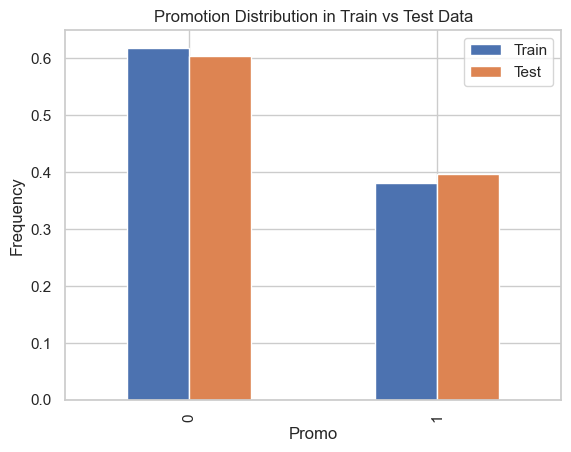

2025-01-05 19:49:37,249 - SalesVisualizer - INFO - Promotion distribution plot generated successfully.


In [51]:
#Check for distribution in both training and test sets
visualizer.compare_promo_distribution()


### Key Observations:

#### Promotion Status "0" (No Promotion):
- The frequency of "No Promotion" is slightly higher in the training set compared to the test set.
- This indicates that there are more days without promotions in the training dataset than in the test dataset.

#### Promotion Status "1" (Promotion):
- The frequency of "Promotion" is nearly equal between the training and test datasets.
- This suggests that the proportion of days with promotions is consistent across both the training and test datasets.

### Insights:

- **Consistent Distribution**: The near-equal distribution of promotion days ("Promotion" status "1") between the training and test sets is a positive sign. It indicates that the model trained on this data will likely generalize well to new, unseen data, as the promotion patterns are similar in both datasets.
  
- **Slight Imbalance in No Promotions**: The slight difference in the "No Promotion" status may not significantly impact the model, but it's worth noting that the training set has a slightly higher proportion of non-promotion days.


2025-01-14 12:25:18,165 - SalesVisualizer - INFO - Comparing sales behavior before, during, and after holidays.
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\visualizations.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


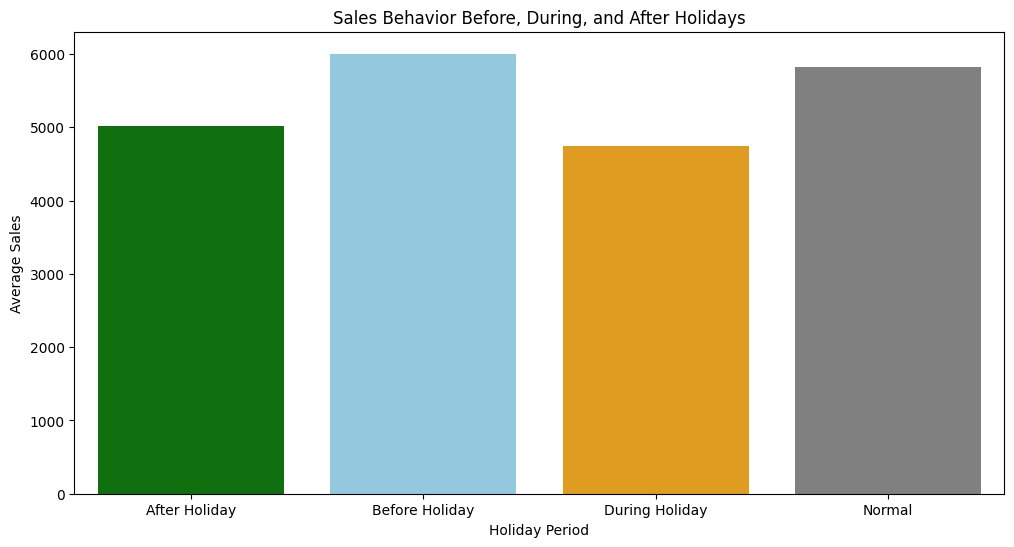

In [86]:
visualizer.sales_behavior_around_holidays()


### Key Observations:

#### Before Holiday:
- Average sales are the highest, around 6000.
- This suggests that customers are likely preparing for the holiday period, leading to a spike in sales.

#### During Holiday:
- Average sales are the lowest, approximately 4500.
- This could be due to stores being closed or reduced shopping activity during the holiday itself.

#### After Holiday:
- Average sales are around 5000.
- This indicates a slight increase in sales after the holiday, possibly due to post-holiday shopping or clearance sales.

#### Normal:
- Average sales are about 5500.
- This represents the typical sales behavior on non-holiday periods.

### Insights:

- **Pre-Holiday Rush**: There is a significant spike in sales before holidays as customers prepare for the holiday period.
- **Holiday Dip**: Sales dip during the holiday period, likely due to store closures or reduced shopping activity.
- **Post-Holiday Activity**: There is a moderate increase in sales after holidays, which may be attributed to post-holiday shopping or promotions.

### Conclusion:
Understanding these trends can help businesses strategize their inventory and marketing efforts. For example, increasing stock and launching targeted promotions before holidays can capitalize on the pre-holiday rush. Planning post-holiday promotions can also help sustain sales momentum after the holiday period.


2025-01-14 12:25:26,496 - SalesVisualizer - INFO - Analyzing seasonal sales behavior.


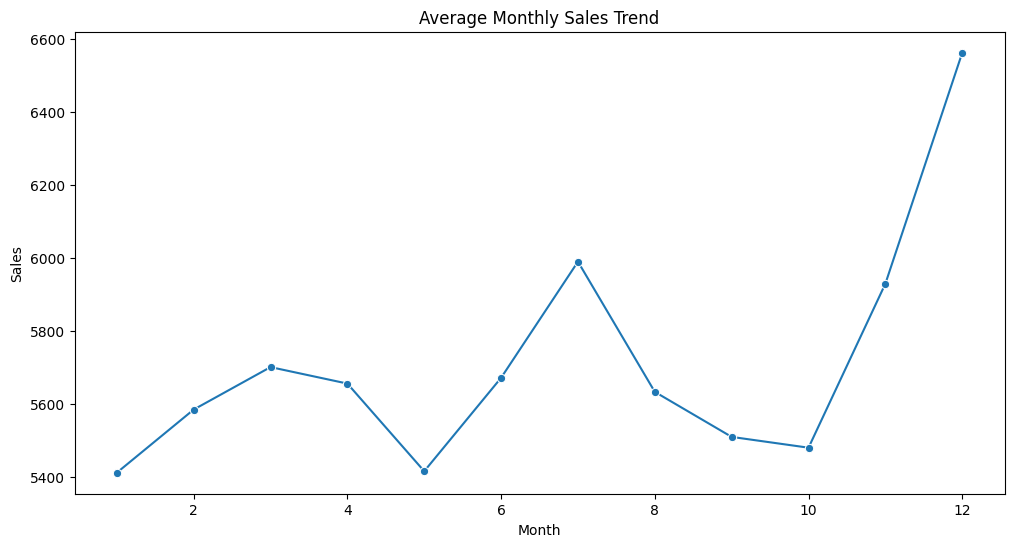

2025-01-14 12:25:27,050 - SalesVisualizer - INFO - Seasonal behavior plot generated successfully.


In [87]:
visualizer.seasonal_behavior()


### Key Observations:

#### December Peak:
- The highest sales peak occurs in December, indicating a significant increase in sales during the Christmas season. This is a clear example of seasonal behavior.

#### Mid-Year Peak:
- There’s a noticeable rise in sales around April and May, which could be associated with Easter preparations and public holidays.

#### Mid-Year Dip:
- The sales dip around June and July suggests a decrease in consumer activity during these months, possibly due to summer holidays or other factors.

### Insights:

- **Christmas Effect**: The substantial rise in sales during December highlights the importance of the Christmas season for retail. Businesses should prepare for increased demand by planning inventory and marketing strategies well in advance.
  
- **Easter and Public Holidays**: The peaks around April and May suggest periods of increased consumer activity, potentially driven by Easter and other public holidays.

- **Mid-Year Slowdown**: The dip around June and July indicates a period of lower consumer spending, which businesses might address with targeted promotions or marketing campaigns.


2025-01-14 12:25:27,219 - SalesVisualizer - INFO - Analyzing correlation between sales and customers.
2025-01-14 12:25:27,253 - SalesVisualizer - INFO - Correlation between Sales and Customers: 0.92


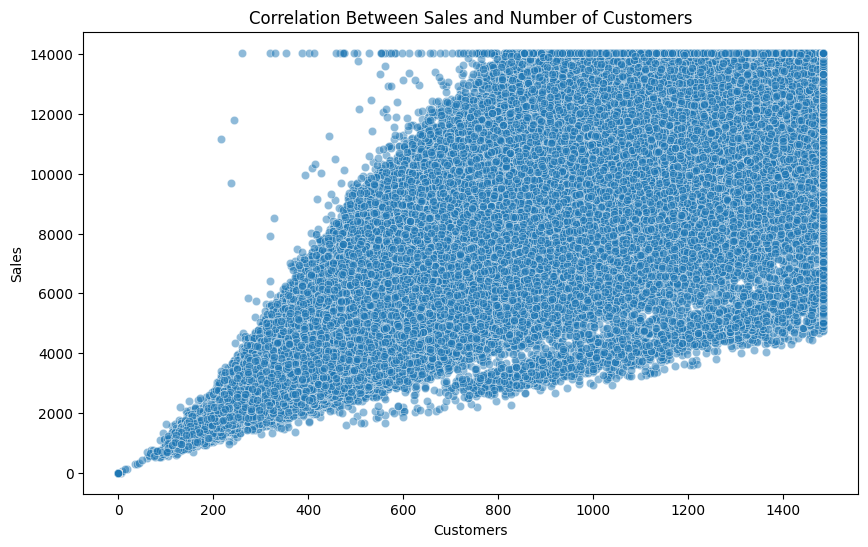

2025-01-14 12:25:31,426 - SalesVisualizer - INFO - Sales and customers correlation plot generated successfully.


In [88]:
visualizer.sales_customer_correlation()


### Key Observations:

#### Positive Correlation:
- The scatter plot displays a clear upward trend, indicating that as the number of customers increases, sales also tend to increase.

#### Correlation Coefficient:
- The calculated correlation coefficient is 0.92, which signifies a very strong positive relationship between sales and the number of customers.

### Insights:

- **Strong Relationship**: The strong positive correlation suggests that increasing the number of customers has a direct and substantial impact on sales.
  
- **Business Strategy**: Focusing on strategies to attract more customers—such as promotions, marketing campaigns, and improving customer experience—can significantly boost sales.

### Conclusion:
The strong correlation between the number of customers and sales highlights the importance of customer acquisition and retention strategies for driving revenue growth.


2025-01-14 12:25:31,593 - SalesVisualizer - INFO - Analyzing promo impact on sales and customer behavior.
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\visualizations.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo_summary = self.train_df.groupby('Promo').agg({


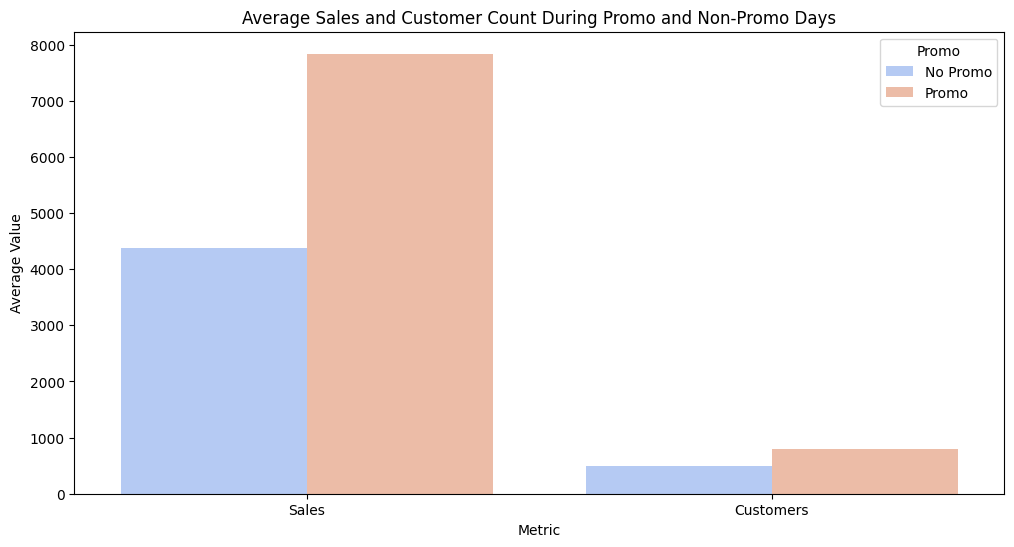

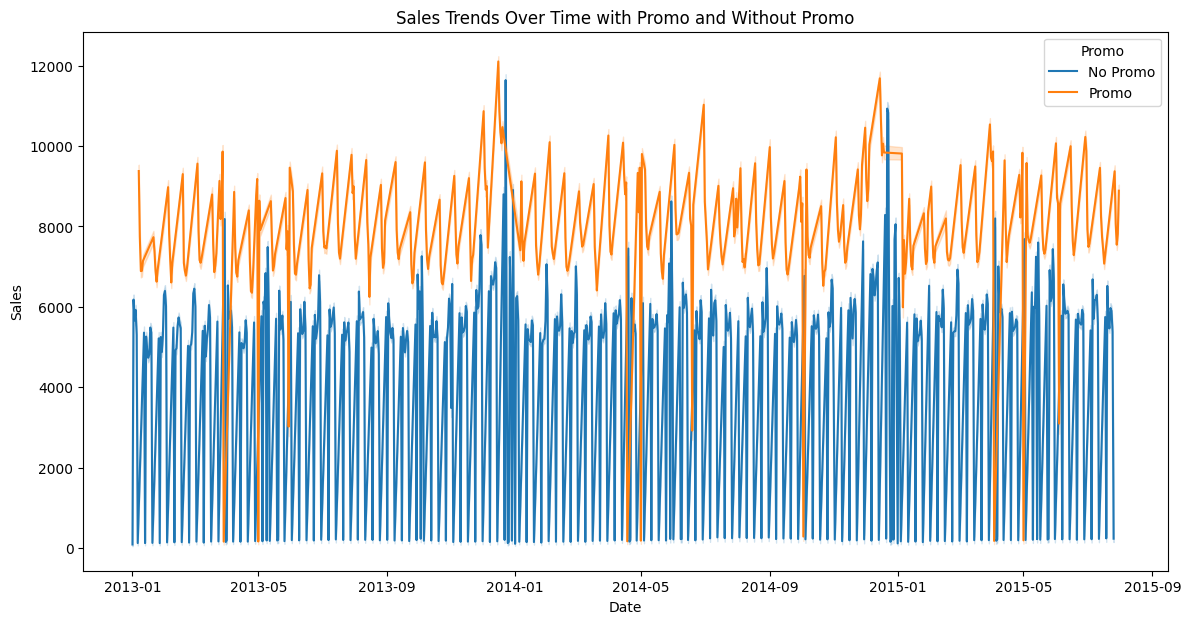

In [89]:
# Visualize how promo affects sales and customer behavior
visualizer.promo_impact_on_sales_and_customers()


### Key Insights:

- **Promos Boost Sales**: Promotional activities significantly increase sales, demonstrating their effectiveness in driving revenue.
  
- **Attracting Customers**: Promotions successfully attract more customers to stores, increasing foot traffic.

- **Engaging Existing Customers**: The increase in sales and customer count suggests that promotions encourage existing customers to make more purchases or visit more frequently.

### Conclusion:
Promotions are a powerful tool for boosting both sales and customer numbers. They attract new customers and positively influence existing customers' purchasing behavior. Businesses should leverage promotions strategically to maximize their sales and customer engagement.


2025-01-14 12:26:17,037 - SalesVisualizer - INFO - Analyzing promo effectiveness across stores.
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\visualizations.py:193: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo_store = self.train_df.groupby(['Store', 'Promo']).agg({
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\visualizations.py:217: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stores, x='Store', y='Sales_Change_%', palette='Blues_d')


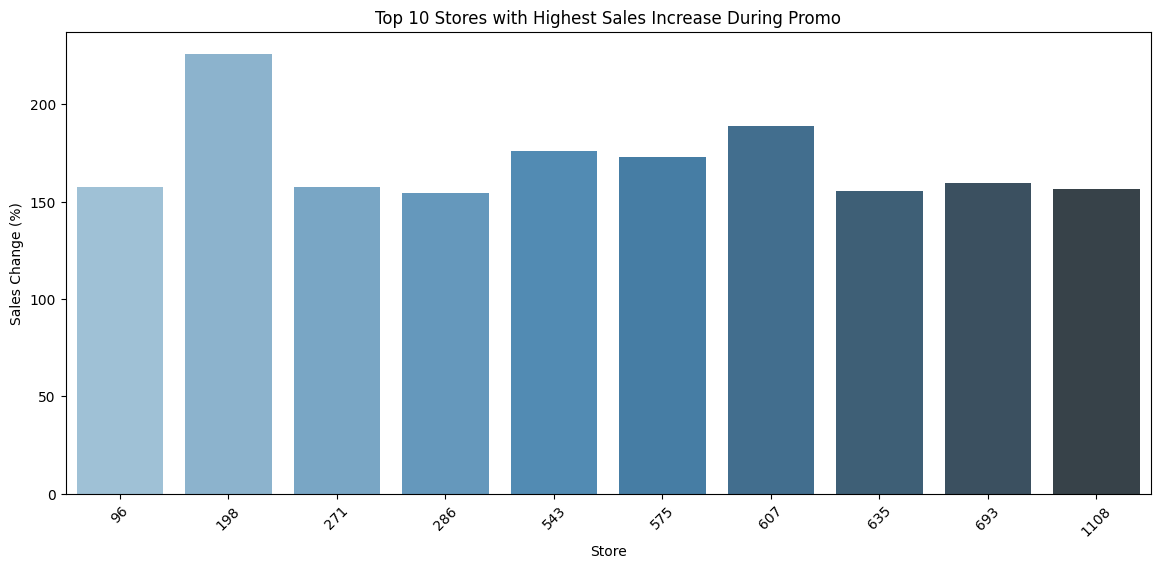

c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\visualizations.py:226: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_stores, x='Store', y='Sales_Change_%', palette='Reds_d')


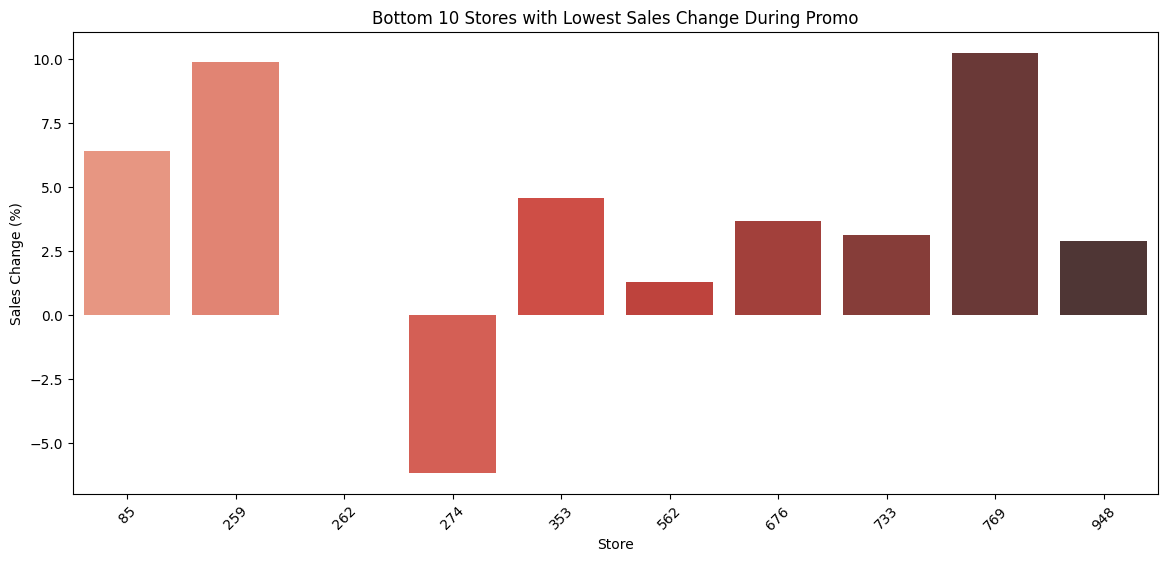

In [90]:

# Visualize where promos should be deployed effectively
visualizer.effective_promo_deployment()




### Sales and Customer Trends During Promo and Non-Promo Days
1. **Sales Trends**:
   - **Promotional Days**: Sales are consistently higher during promotional periods compared to non-promotional days. The line chart shows clear peaks in sales during these times.
   - **Non-Promotional Days**: Sales are lower, indicating that promotions effectively boost sales.

2. **Customer Trends**:
   - **Promotional Days**: The number of customers significantly increases during promotions, indicating that these activities attract more customers.
   - **Non-Promotional Days**: Customer numbers are lower, suggesting that promotions are a key driver of foot traffic.

### Average Sales and Customer Count on Promo and Non-Promo Days
1. **Average Sales**:
   - Promotional days see nearly double the average sales compared to non-promotional days, showcasing the substantial impact of promotions on revenue.

2. **Average Customer Count**:
   - The number of customers on promotional days is significantly higher, reflecting the effectiveness of promotions in attracting more shoppers.

### Bottom 10 Stores with Lowest Sales Change During Promo
1. **Sales Change During Promo**:
   - Stores with the lowest percentage change in sales during promotions are identified. Some stores, like store 274, even experienced a negative change.
   - These stores show minimal or negative impact from promotional activities.

### Key Insights
1. **Impact on Sales**: Promotions are highly effective in boosting sales, as evidenced by the significant increase in sales figures during promotional periods.
2. **Attracting Customers**: Promotions successfully attract more customers, leading to higher foot traffic in stores.
3. **Engaging Existing Customers**: Promotions encourage existing customers to make more purchases or visit more frequently, contributing to increased sales.
4. **Effectiveness Across Stores**: While most stores benefit from promotions, some stores show minimal or negative change, indicating that promotions might not be equally effective everywhere.

### Recommendations
1. **Strategic Deployment**: Focus promotions on stores that have shown positive responses to previous promotional activities. For stores with minimal or negative impact, reassess the promotional strategies and consider alternative approaches.
2. **Tailored Promotions**: Customize promotions based on store-specific data to maximize effectiveness. Analyze the characteristics of stores with the highest and lowest sales changes to identify factors influencing promotional success.
3. **Continuous Monitoring**: Regularly monitor and analyze sales and customer trends to adjust promotional strategies dynamically, ensuring maximum impact.

Promotions play a crucial role in boosting sales and attracting customers, but their effectiveness can vary across different stores. Businesses should strategically deploy and tailor promotions to optimize their impact, leveraging data-driven insights for continuous improvement.



2025-01-14 12:26:18,237 - SalesVisualizer - INFO - Analyzing customer behavior during store opening and closing times.
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\visualizations.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_customers, x='Day', y='Customers', palette='viridis')


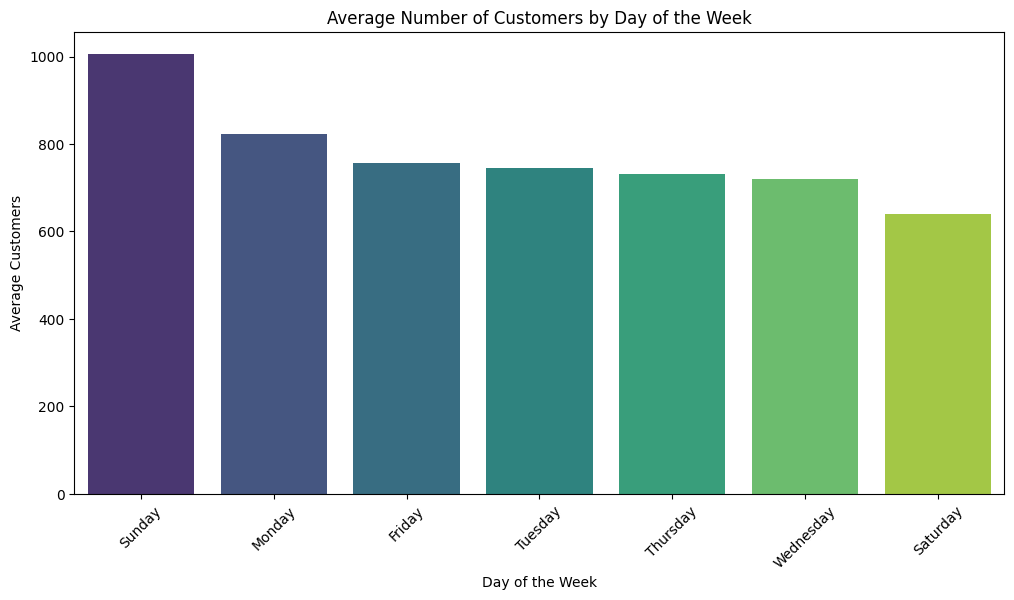

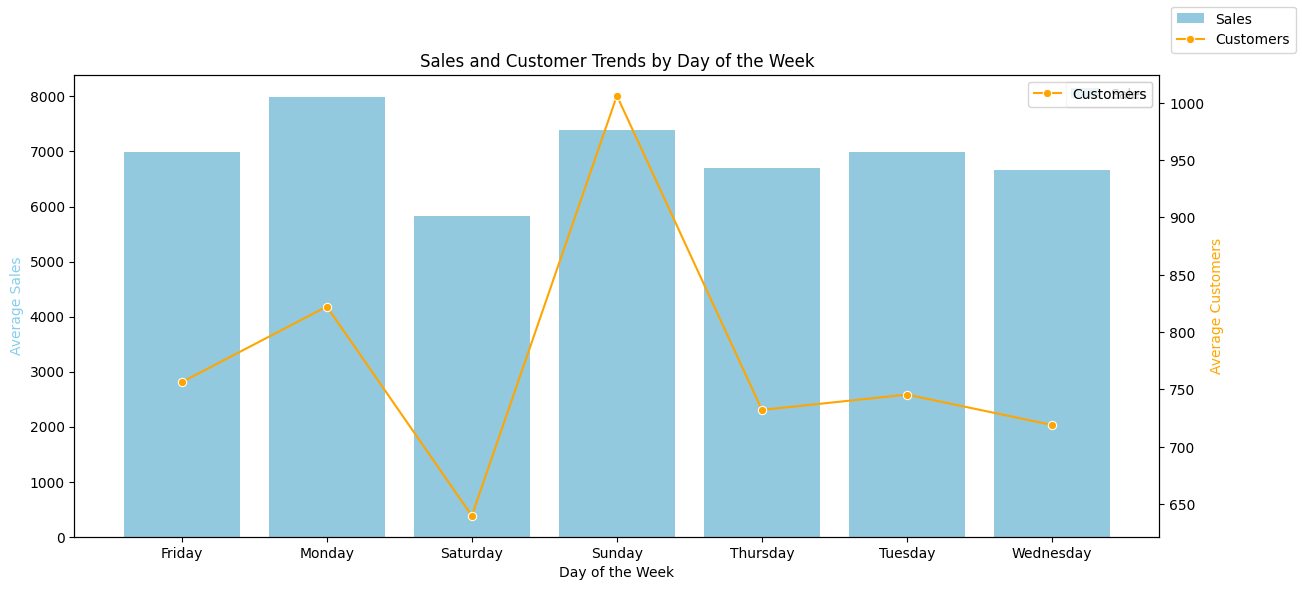

In [91]:

# Visualize customer behavior during store opening and closing times
visualizer.customer_behavior_during_opening_closing()



### Key Observations:
1. **Highest Sales and Customers on Sunday**:
   - Sunday has the highest average sales and number of customers, indicating it's the busiest day of the week.

2. **Lowest Sales and Customers on Saturday**:
   - Saturday has the lowest average sales and number of customers. This could be due to various factors such as customer preferences or specific store policies.

3. **Steady Trends on Other Days**:
   - The average number of customers remains relatively stable from Thursday to Wednesday with slight variations, suggesting consistent customer traffic on these days.

### Insights:
1. **Targeting Sunday for Promos**:
   - Since Sunday already has high sales and customer numbers, deploying promotions on this day can further boost sales and attract even more customers.

2. **Improving Saturday Traffic**:
   - The low sales and customer numbers on Saturday suggest an opportunity to deploy promotions to attract more customers and boost sales on this day.

3. **Consistent Mid-Week Traffic**:
   - Maintaining or slightly increasing promotions on mid-week days can help sustain consistent customer traffic and sales.

### Recommendations:
1. **Focus on Low-Traffic Days**:
   - Deploy promotions on Saturdays to attract more customers and improve sales on the lowest-performing day.
   
2. **Enhance High-Traffic Days**:
   - Utilize promotions on Sundays to capitalize on the already high customer traffic and maximize sales.

3. **Regular Promotions Mid-Week**:
   - Maintain regular promotions during mid-week days to ensure consistent sales and customer traffic.

By strategically deploying promotions on specific days of the week based on the observed trends, businesses can optimize their promotional efforts to maximize customer engagement and sales.


2025-01-14 12:26:20,005 - SalesVisualizer - INFO - Analyzing stores open on all weekdays and their sales on weekends.


Stores consistently open on weekdays: [85, 262, 335, 423, 494, 562, 682, 733, 769, 1097]


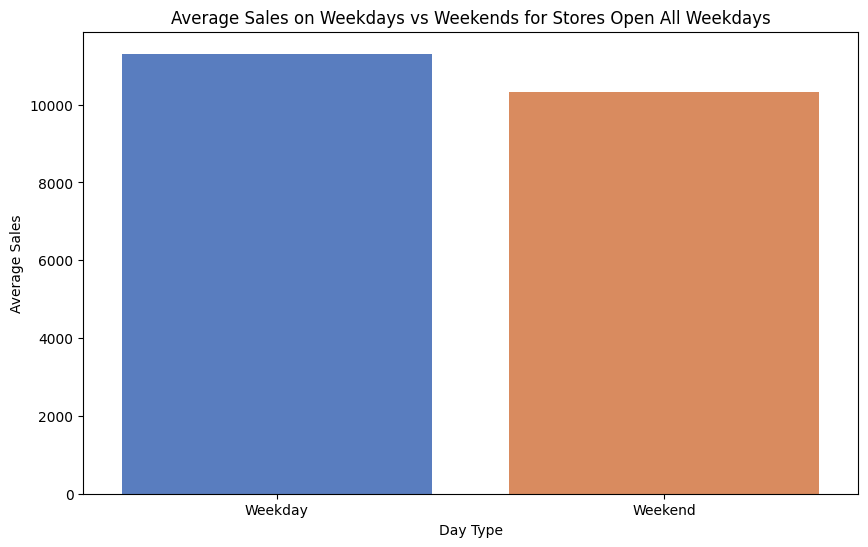

2025-01-14 12:26:20,511 - SalesVisualizer - INFO - Sales behavior for stores open on all weekdays visualized successfully.


In [92]:
visualizer.analyze_weekday_vs_weekend_sales()


**Stores Open All Weekdays**:
- The bar chart shows the average sales on weekdays vs. weekends for stores that are open all weekdays.

### Key Observations:
1. **Weekday Sales**:
   - Stores open on all weekdays have slightly higher average sales on weekdays, just above 11,000.
2. **Weekend Sales**:
   - Average sales on weekends for these stores are slightly lower, just above 10,000.

### Insights:
- **Consistent Weekday Traffic**: Stores open all weekdays tend to maintain steady sales during weekdays, indicating consistent customer traffic.
- **Weekend Effect**: Although these stores experience a slight drop in sales on weekends, their overall performance remains strong due to consistent weekday sales.

### Conclusion:
- **Operational Strategy**: Stores open all weekdays should maintain or even enhance their operations during weekdays to capitalize on higher sales. They might also consider targeted promotions or events to boost weekend sales.
- **Balanced Performance**: Maintaining consistent weekday operations ensures a stable revenue stream, while weekend promotions can help balance the slight dip in sales.



2025-01-14 12:26:20,623 - SalesVisualizer - INFO - Analyzing how assortment type affects sales.
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\visualizations.py:340: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Assortment')['Sales']


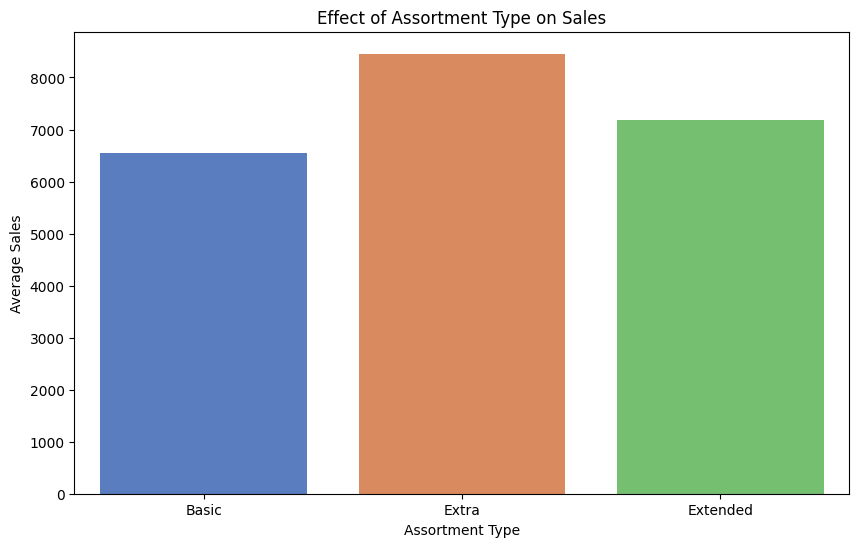

2025-01-14 12:26:20,981 - SalesVisualizer - INFO - Sales by assortment type plot generated successfully.


In [93]:

# Visualize how assortment type affects sales
visualizer.assortment_type_sales_impact()


**Effect of Assortment Type on Sales**

The bar chart shows the average sales for three different assortment types: Basic, Extra, and Extended.

### Key Observations:
1. **Extra Assortment**:
   - The Extra assortment type has the highest average sales, indicating that offering a broader range of products significantly boosts sales.

2. **Extended Assortment**:
   - The Extended assortment type follows, with average sales slightly lower than the Extra type but still higher than the Basic type.
  
3. **Basic Assortment**:
   - The Basic assortment type has the lowest average sales, suggesting that a limited product range might not attract as many customers or drive sales as effectively as the other types.

### Insights:
- **Broader Assortments Attract More Sales**: Offering a wider range of products (Extra) leads to higher average sales. This could be due to increased customer satisfaction, variety, and the ability to meet diverse customer needs.
- **Extended vs. Basic**: While the Extended assortment also performs well, it does not surpass the Extra type. However, it still outperforms the Basic type, indicating that even a moderate increase in product variety can positively impact sales.

### Conclusion:
- **Strategic Product Offerings**: Retailers should consider expanding their product assortments to drive higher sales. The data suggests that broader assortments (Extra) are most effective in attracting customers and boosting sales.
- **Continuous Evaluation**: Regularly assess and adjust the product assortment to align with customer preferences and market trends, ensuring optimal sales performance.

By focusing on expanding their product range, retailers can leverage the positive impact of diverse assortments to maximize sales and customer satisfaction.


2025-01-14 13:18:32,608 - SalesVisualizer - INFO - Analyzing the effect of competitor distance on sales.


Overall Correlation between Sales and CompetitionDistance: -0.02


2025-01-14 13:18:34,089 - SalesVisualizer - INFO - Competitor distance analysis completed successfully.


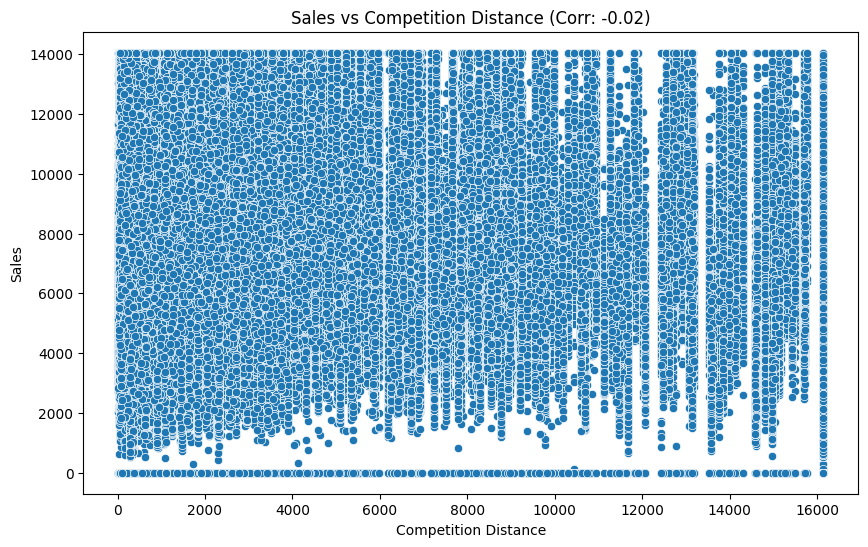

In [98]:
visualizer.analyze_competition_distance_effect()

### Analysis of Competitor Distance Impact on Sales

**Correlation Result**:
- **Overall Correlation**: The correlation coefficient between `Sales` and `CompetitionDistance` is -0.02. This indicates a very weak negative correlation, suggesting that there is almost no linear relationship between the distance to the nearest competitor and sales.

**Scatter Plot**:
- The scatter plot visually demonstrates that there is significant variability in sales regardless of the distance to competitors. Sales values are spread out across all distances, from very close competitors to those farther away.

### Key Insights:

1. **Minimal Impact of Distance**:
   - The weak correlation (almost zero) suggests that the distance to the nearest competitor does not have a significant impact on sales. This indicates that other factors might be more influential in determining sales performance.

2. **Sales Variability**:
   - The scatter plot shows that sales are highly variable at all distances, reinforcing that the proximity of competitors alone is not a strong predictor of sales performance.

### Conclusion:

- **Focus on Other Factors**: Given the minimal impact of competitor distance on sales, businesses should focus on enhancing other aspects such as product assortment, customer experience, marketing strategies, and store accessibility to drive sales.
- **City Center Dynamics**: If the stores and competitors are located in city centers, factors like foot traffic, accessibility, local demand, and brand loyalty might play a more substantial role than the physical distance to competitors.



2025-01-14 12:50:32,936 - SalesVisualizer - INFO - Starting analyze_competition_impact method.
2025-01-14 12:50:33,369 - SalesVisualizer - INFO - Identified stores with no competitors: [291, 622, 879]
2025-01-14 12:50:33,381 - SalesVisualizer - INFO - Store 291 did not have a competitor open later.
2025-01-14 12:50:33,389 - SalesVisualizer - INFO - Store 622 did not have a competitor open later.
2025-01-14 12:50:33,398 - SalesVisualizer - INFO - Store 879 did not have a competitor open later.
2025-01-14 12:50:43,135 - SalesVisualizer - INFO - Generated average sales data for each category.


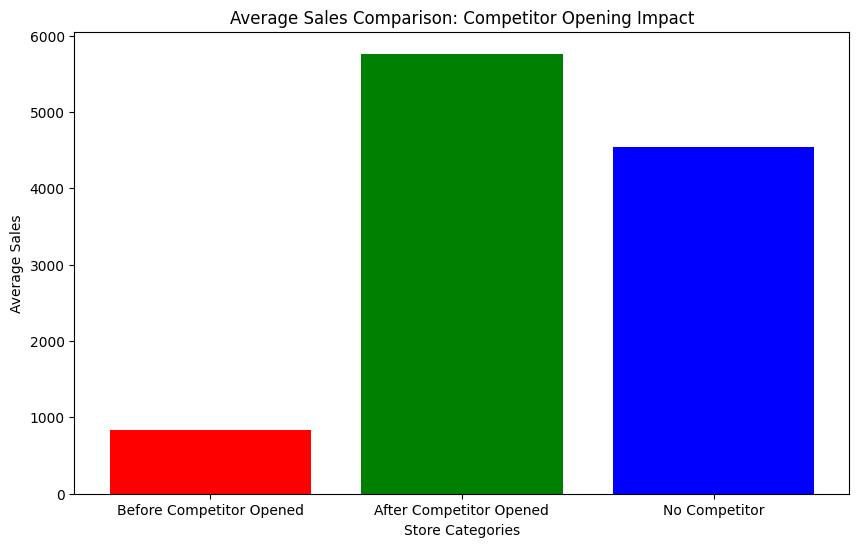

2025-01-14 12:50:43,384 - SalesVisualizer - INFO - Displayed bar chart for sales comparison.


In [95]:
visualizer.analyze_competition_impact(raw_data)

### Analysis of Competitor Impact on Stores

The bar chart titled "Average Sales Comparison: Competitor Opening Impact" provides insights into how the opening or reopening of new competitors affects existing stores.

### Key Observations:
1. **Before Competitor Opened**:
   - Average sales are approximately 1,000, indicating lower sales before the competitor opened.

2. **After Competitor Opened**:
   - Average sales increase significantly to approximately 6,000, suggesting a substantial boost in sales after the competitor opens.

3. **No Competitor**:
   - Average sales are around 4,500, indicating higher sales compared to stores without competitors but lower than those with competitors.

### Insights:
- **Increased Competition Drives Sales**: The presence of competitors appears to drive higher sales, possibly due to increased market activity and customer interest.
- **Strategic Response**: Existing stores may need to enhance their strategies to maintain or improve their competitive edge when new competitors enter the market.

### Conclusion:
- **Competitor Presence Benefits Sales**: The opening or reopening of competitors positively impacts sales for existing stores, highlighting the importance of competitive strategies.
- **Continuous Monitoring**: Regularly monitor competitor activities and adjust strategies to leverage the increased market activity and maintain sales growth.
